# Water Quality Prediction
Author(s): Amy Ou, Bryan Flores, Trevor Sauerbrey

In [1]:
''' Dependencies '''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
''' Import CSV '''
water = pd.read_csv('./data/water_potability.csv')
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Analysis

In [3]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


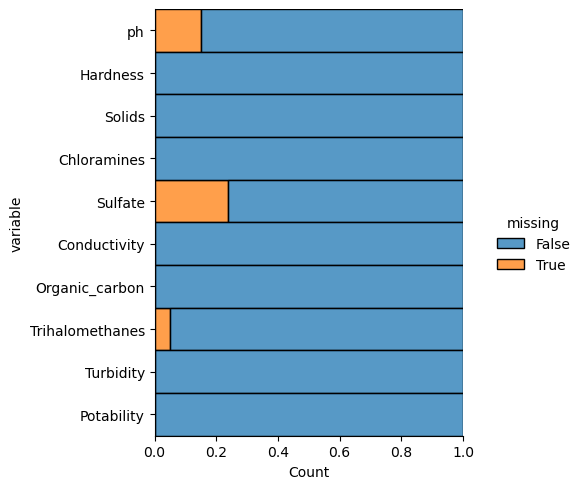

In [6]:
# Get counts of NaN and plot distribution of missing values
sns.displot(data=water.isna().melt(value_name='missing'), y='variable', hue='missing',
            multiple='fill', aspect=1
            )
plt.show()

C:\Users\Rudy\AppData\Local\Temp\ipykernel_27828\1789739055.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=water_miss_vals, x='Sulfate', shade=True, color='g')
C:\Users\Rudy\AppData\Local\Temp\ipykernel_27828\1789739055.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=water_miss_vals, x='Trihalomethanes', shade=True, color='b')


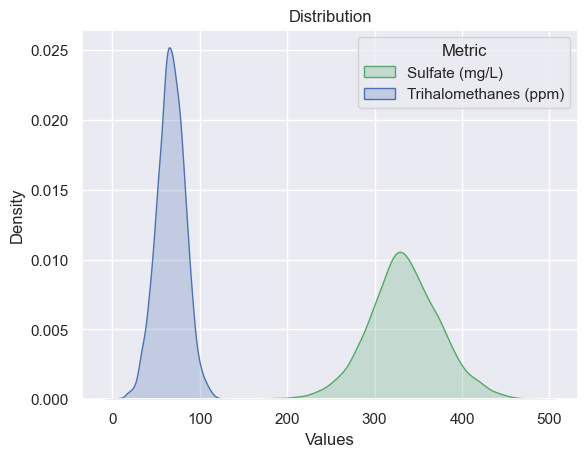

In [7]:
# Density plot of Sulfate & Trihalomethanes
sns.set(style="darkgrid")

water_miss_vals = water[['Sulfate', 'Trihalomethanes']]
labels = ['Sulfate (mg/L)', 'Trihalomethanes (ppm)']

# sns.kdeplot(data=water_miss_vals, x='ph', shade=True, color='r')
sns.kdeplot(data=water_miss_vals, x='Sulfate', shade=True, color='g')
sns.kdeplot(data=water_miss_vals, x='Trihalomethanes', shade=True, color='b')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution')
plt.legend(title='Metric', labels=labels, loc='upper right')
plt.show()

C:\Users\Rudy\AppData\Local\Temp\ipykernel_27828\68888113.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=water_miss_vals, x='ph', shade=True, color='r')


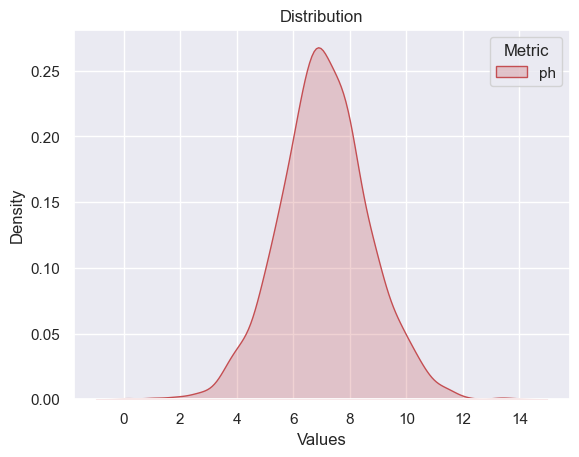

In [8]:
# Density plot of ph
sns.set(style="darkgrid")

water_miss_vals = water[['ph']]
labels = list(water_miss_vals.columns)

sns.kdeplot(data=water_miss_vals, x='ph', shade=True, color='r')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Distribution')
plt.legend(title='Metric', labels=labels, loc='upper right')
plt.show()

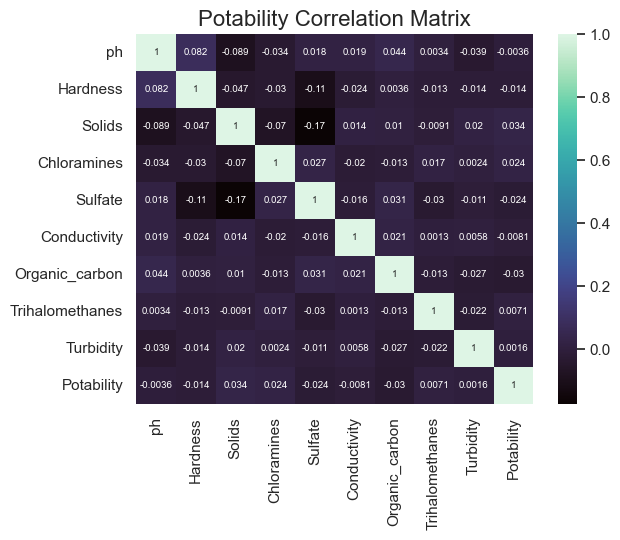

In [10]:
# Correlation matrix
sns.heatmap(data=water.corr(), cmap='mako', annot=True, annot_kws={"size": 7})
plt.title('Potability Correlation Matrix', size=16)
plt.show()

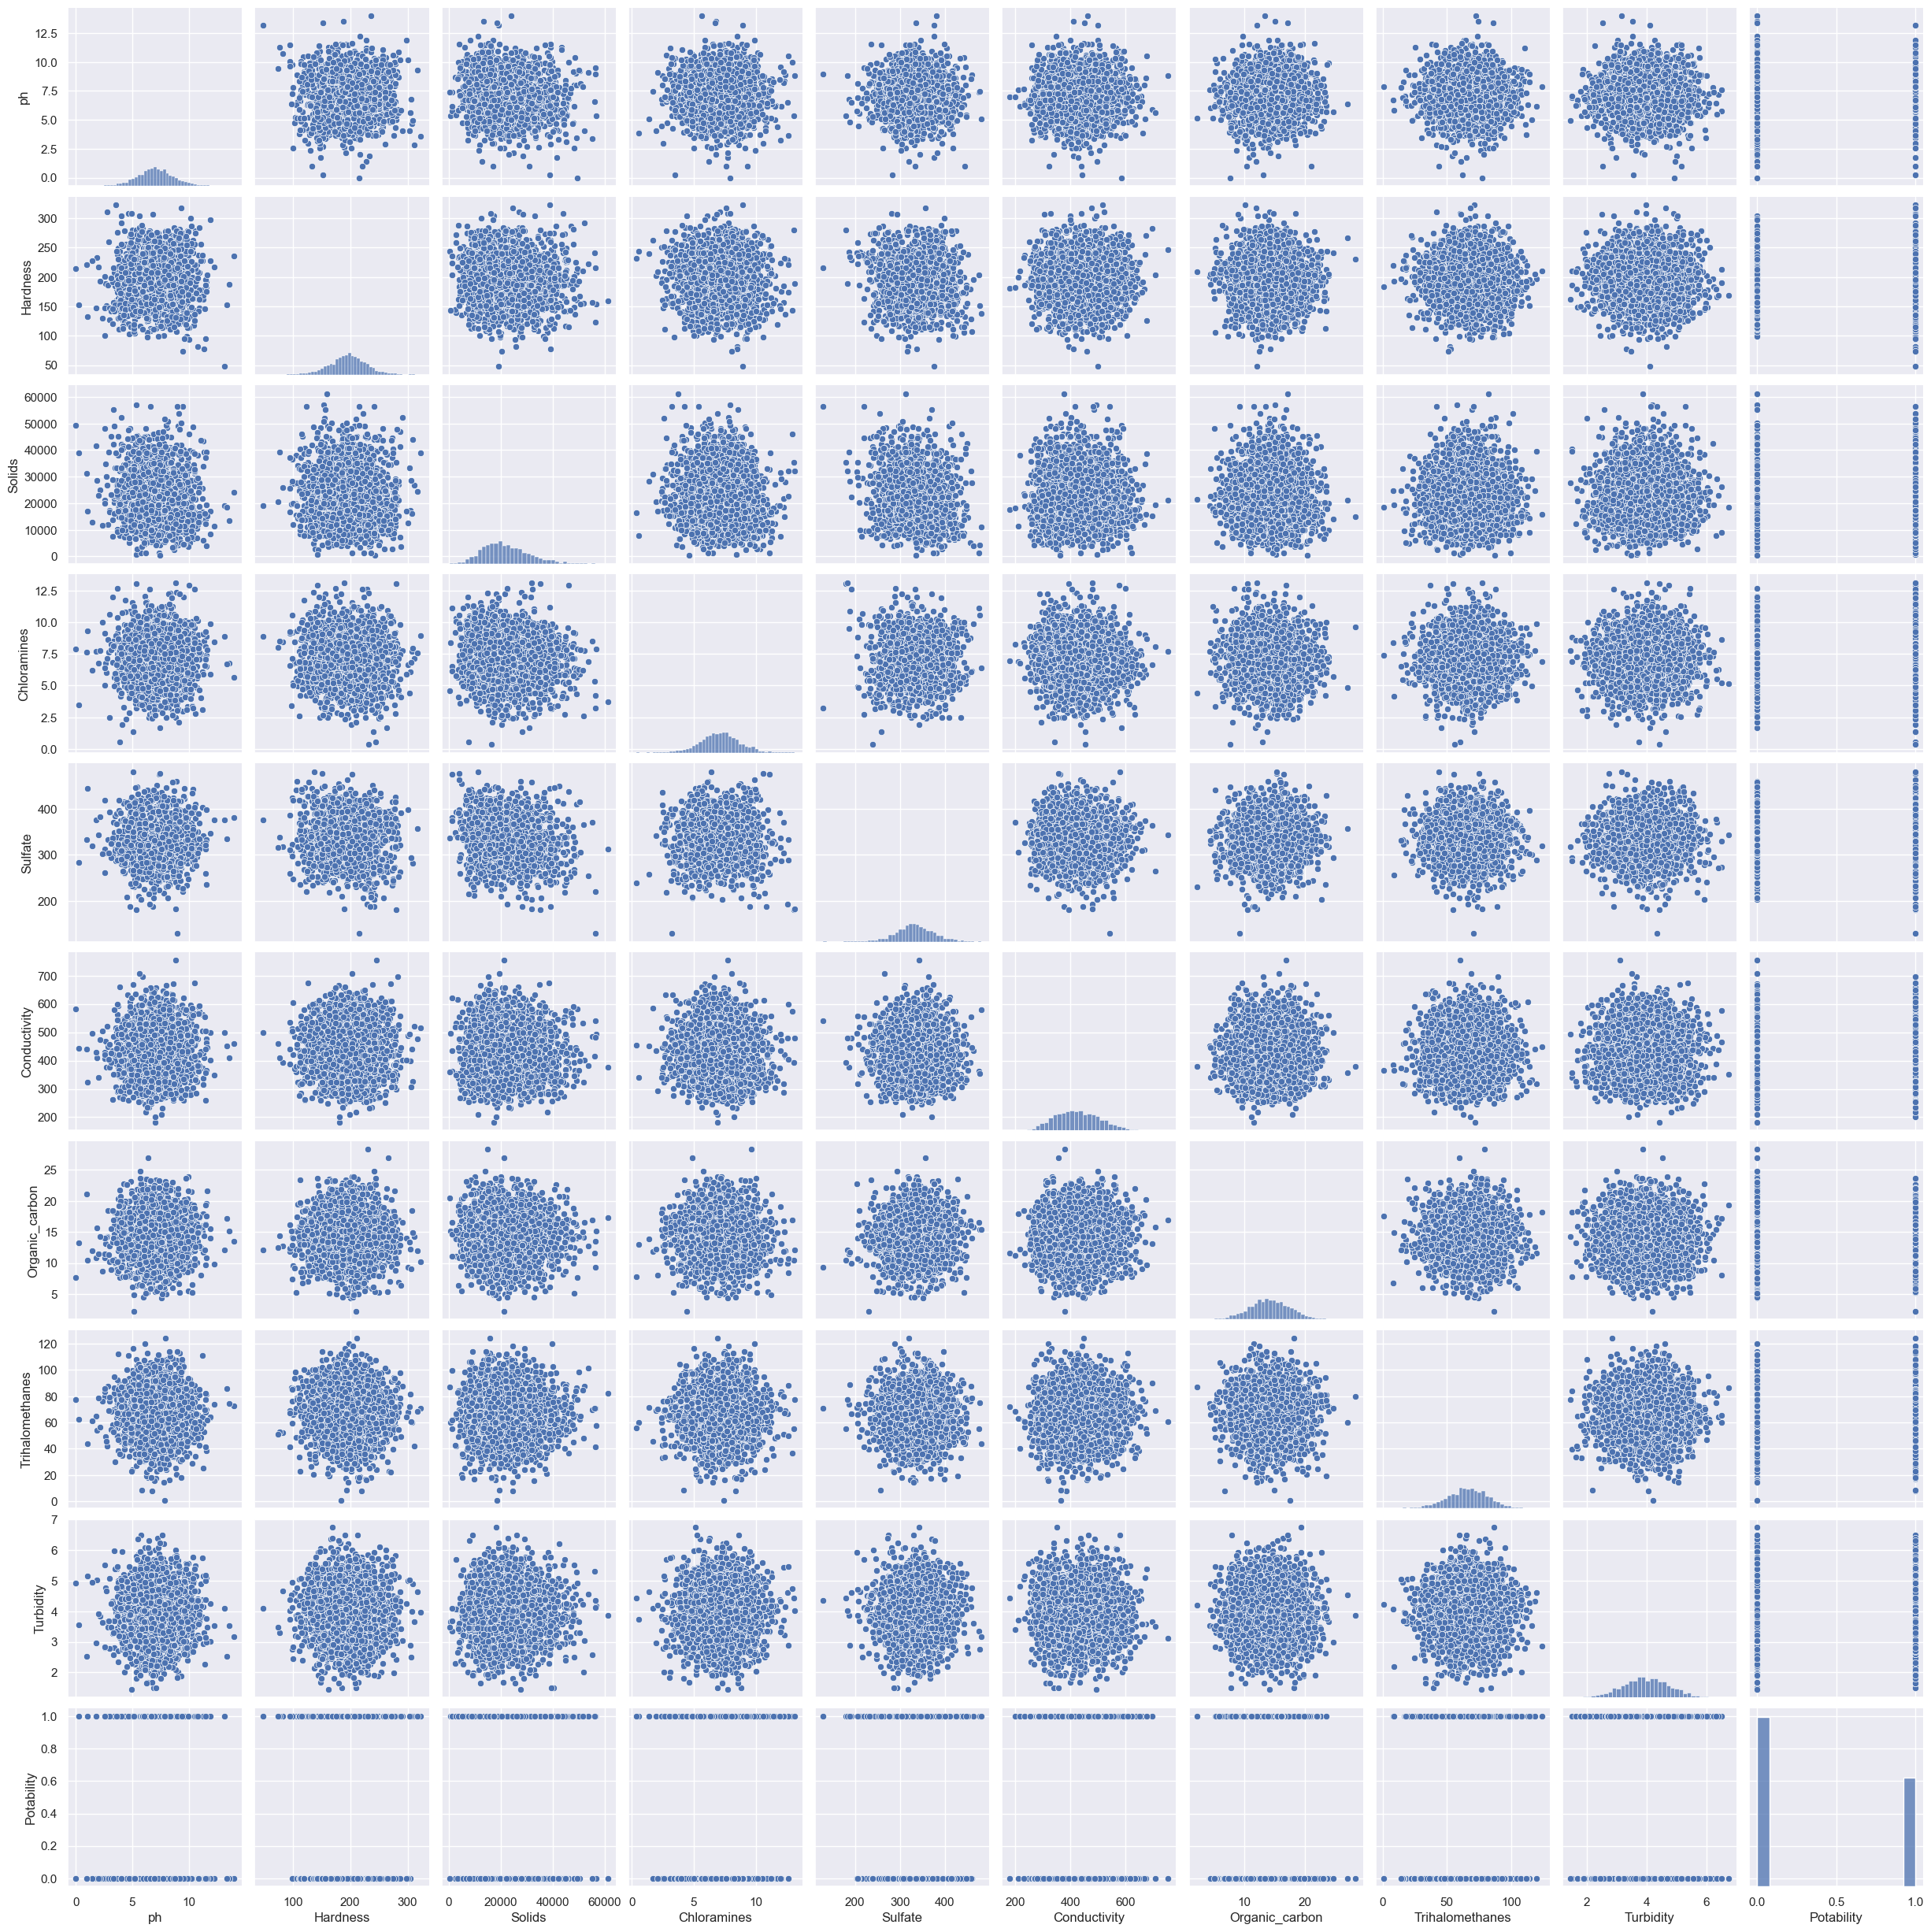

In [30]:
# Distributions
sns.pairplot(water)
plt.show()

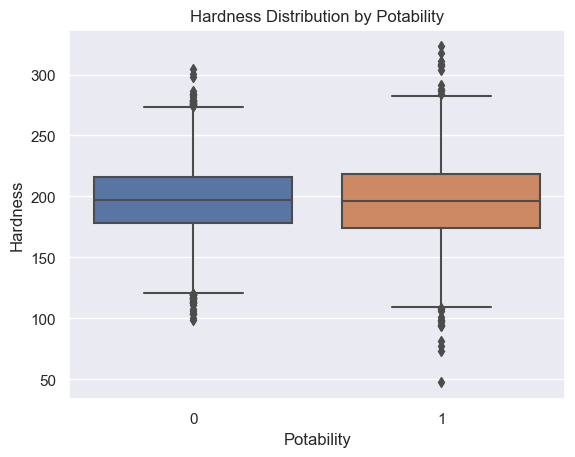

In [11]:
# Exploring the relationship between potability and hardness
sns.boxplot(x='Potability', y='Hardness', data=water)
plt.xlabel('Potability')
plt.ylabel('Hardness')
plt.title('Hardness Distribution by Potability')
plt.show()

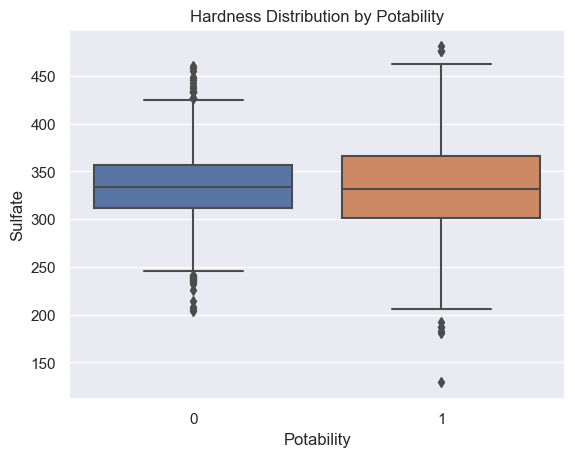

In [12]:
# Exploring the relationship between potability and sulfate
sns.boxplot(x='Potability', y='Sulfate', data=water)
plt.xlabel('Potability')
plt.ylabel('Sulfate')
plt.title('Hardness Distribution by Potability')
plt.show()

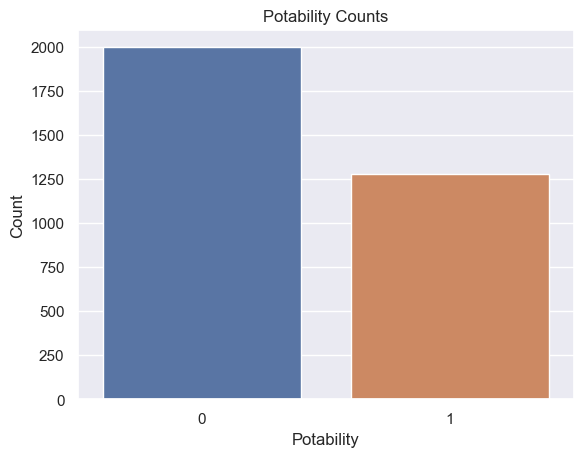

In [13]:
# Exploring the target variable class balance
sns.countplot(x='Potability', data=water)
plt.xlabel('Potability')
plt.ylabel('Count')
plt.title('Potability Counts')
plt.show()

In [28]:
# Proportions of the Potability (dependent variable) labels
label_cts = water['Potability'].value_counts()
label_dec = list(round((label_cts / len(water)), 2))
label_perc = [(str(label) + '%') for label in label_dec]

print(f"Potable: {label_perc[0]}")
print(f"Not Potable: {label_perc[1]}")

Potable: 0.61%
Not Potable: 0.39%


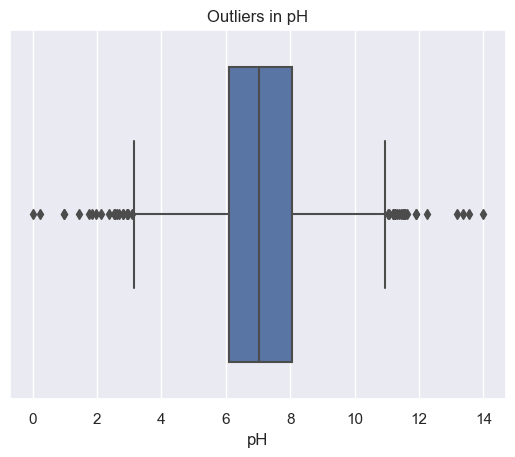

In [14]:
# Exploring outliers in the target variables
sns.boxplot(x=water['ph'])
plt.xlabel('pH')
plt.title('Outliers in pH')
plt.show()

## Model Training